In [ ]:
##pip install yahoo_fin
##pip install yahoo_fin --upgrade
##pip install requests_html

In [ ]:
from yahoo_fin.stock_info import get_data

In [1]:
import pandas as pd
import numpy as np

In [3]:
#downloaded from https://finance.yahoo.com/quote/AMZN/history?period1=863654400&period2=1660348800&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true

file_path = "AMZN.csv"
csv_df = pd.read_csv(file_path) #,index_col = 0
csv_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000
...,...,...,...,...,...,...,...
6349,2022-08-08,142.050003,144.229996,138.289993,139.410004,139.410004,52229000
6350,2022-08-09,138.050003,138.949997,136.210007,137.830002,137.830002,40434700
6351,2022-08-10,142.899994,144.600006,141.009995,142.690002,142.690002,54773800
6352,2022-08-11,143.860001,144.490005,139.759995,140.639999,140.639999,44867300


In [ ]:
#interval: {“1d”, “1wk”, “1mo”}. Refers to the interval to sample the data: “1d”= daily, “1wk”= weekly, “1mo”=monthly.

In [32]:
#api_df= get_data("amzn", start_date="05/14/1997", end_date="07/05/2022", index_as_date = True, interval="1d")
#api_df

In [ ]:
# use the close value and the date

In [4]:
df = csv_df[['Date', 'Close']]
df

,Date,Close
0,1997-05-15,0.097917
1,1997-05-16,0.086458
2,1997-05-19,0.085417
3,1997-05-20,0.081771
4,1997-05-21,0.071354
...,...,...
6349,2022-08-08,139.410004
6350,2022-08-09,137.830002
6351,2022-08-10,142.690002
6352,2022-08-11,140.639999


In [5]:
df['Date']

0       1997-05-15
1       1997-05-16
2       1997-05-19
3       1997-05-20
4       1997-05-21
           ...    
6349    2022-08-08
6350    2022-08-09
6351    2022-08-10
6352    2022-08-11
6353    2022-08-12
Name: Date, Length: 6354, dtype: object

In [6]:
import datetime

def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)

In [7]:
datetime_object = str_to_datetime('1997-05-15')
datetime_object

datetime.datetime(1997, 5, 15, 0, 0)

In [8]:
#apply function to column 'Date' to conver to integers
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

C:\Users\rctay\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0      1997-05-15
1      1997-05-16
2      1997-05-19
3      1997-05-20
4      1997-05-21
          ...    
6349   2022-08-08
6350   2022-08-09
6351   2022-08-10
6352   2022-08-11
6353   2022-08-12
Name: Date, Length: 6354, dtype: datetime64[ns]

In [9]:
#remove index column
df.index = df.pop('Date')
df

,Close
Date,
1997-05-15,0.097917
1997-05-16,0.086458
1997-05-19,0.085417
1997-05-20,0.081771
1997-05-21,0.071354
...,...
2022-08-08,139.410004
2022-08-09,137.830002
2022-08-10,142.690002


In [10]:
import matplotlib.pyplot as plt

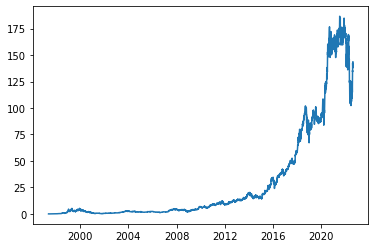

In [11]:
plt.plot(df.index , df['Close'])

In [28]:
#create a supervised learning problem  LSTM(long short term memory) model



import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '1997-05-20'
windowed_df = df_to_windowed_df(df, 
                                '1997-05-20', 
                                '2022-08-12', 
                                n=3)
windowed_df.head()

,Target Date,Target-3,Target-2,Target-1,Target
0,1997-05-20,0.097917,0.086458,0.085417,0.081771
1,1997-05-21,0.086458,0.085417,0.081771,0.071354
2,1997-05-22,0.085417,0.081771,0.071354,0.069792
3,1997-05-23,0.081771,0.071354,0.069792,0.075000
4,1997-05-27,0.071354,0.069792,0.075000,0.079167


In [30]:
def windowed_df_to_date_X_y(windowed_dataframe):
    df_as_np = windowed_dataframe.to_numpy()
    
    dates = df_as_np[:, 0]
    
    middle_matrix = df_as_np[:, 1:-1]
    X= middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))
    
    Y= df_as_np[:, -1]
    
    return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y= windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

## 3 steps in the past for 1 type of variable

((6351,), (6351, 3, 1), (6351,))

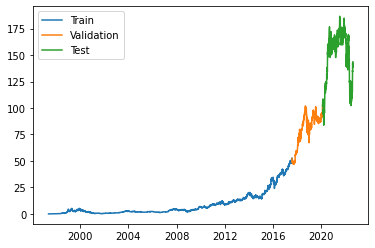

In [31]:
#train 14.07m

q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [33]:
#create and train the model  Tesnsor flow

from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

In [34]:
###  (3days in the past) 3 inputs and 1 feature(close), 64 neurons , relu,  
## mse = mean squared error
## 100 runs

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
159/159 [==============================] - 6s 12ms/step - loss: 81.9762 - mean_absolute_error: 4.0074 - val_loss: 1530.3647 - val_mean_absolute_error: 36.1287
Epoch 2/100
159/159 [==============================] - 1s 5ms/step - loss: 0.2010 - mean_absolute_error: 0.2067 - val_loss: 1088.8381 - val_mean_absolute_error: 29.6327
Epoch 3/100
159/159 [==============================] - 1s 5ms/step - loss: 0.0934 - mean_absolute_error: 0.1662 - val_loss: 1003.1779 - val_mean_absolute_error: 28.3013
Epoch 4/100
159/159 [==============================] - 1s 5ms/step - loss: 0.1115 - mean_absolute_error: 0.1858 - val_loss: 960.5217 - val_mean_absolute_error: 27.6289
Epoch 5/100
159/159 [==============================] - 1s 5ms/step - loss: 0.0842 - mean_absolute_error: 0.1623 - val_loss: 936.0411 - val_mean_absolute_error: 27.2308
Epoch 6/100
159/159 [==============================] - 1s 6ms/step - loss: 0.0907 - mean_absolute_error: 0.1681 - val_loss: 918.0541 - val_mean_absolute_er

159/159 [==============================] - 1s 6ms/step - loss: 0.0798 - mean_absolute_error: 0.1555 - val_loss: 684.0369 - val_mean_absolute_error: 22.9207
Epoch 98/100
159/159 [==============================] - 1s 6ms/step - loss: 0.0759 - mean_absolute_error: 0.1504 - val_loss: 706.7773 - val_mean_absolute_error: 23.3617
Epoch 99/100
159/159 [==============================] - 1s 6ms/step - loss: 0.0695 - mean_absolute_error: 0.1427 - val_loss: 727.5836 - val_mean_absolute_error: 23.8179
Epoch 100/100
159/159 [==============================] - 1s 6ms/step - loss: 0.0724 - mean_absolute_error: 0.1440 - val_loss: 769.9312 - val_mean_absolute_error: 24.5728


In [ ]:
import neptune.new as neptune
import os

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from datetime import date
from matplotlib import pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.models import Sequential, Model
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate

import tensorflow as tf 

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt